# 使用三种API开放平台实现人脸识别

## Microsoft Azure

### 单人

In [18]:
# 先导入为们需要的模块
import requests
import json
import pandas as pd

KEY = 'dfcc20c58f3a4c2bbabfc474161feafd'  # Replace with a valid Subscription Key here.

# Base URL,  Request URL中 符号?以前
#。                          eastasia.api.cognitive.microsoft.com  ==》{endpoint}
BASE_URL = 'https://eastasia.api.cognitive.microsoft.com/face/v1.0/detect' # 人脸检测
HEADERS = {
    # Request headers
    'Content-Type': 'application/json',
    'Ocp-Apim-Subscription-Key': '{}'.format(KEY), #''  
}

img_url = 'https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1586733241633&di=21f51639fe4a28dadc651685feeb7708&imgtype=0&src=http%3A%2F%2Fwx2.sinaimg.cn%2Forj360%2F007RoviYly1gd9p4j7hlyj311z1rawpj.jpg'
data = {
    'url': '{}'.format(img_url),
}
payload = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'flase',
    'returnFaceAttributes': '{}'.format('age,gender,glasses,hair,emotion,smile'), 
}
r = requests.post(BASE_URL,data=json.dumps(data),params=payload,headers=HEADERS)
r.status_code
results = r.json()

df = pd.json_normalize(results)

df = df.set_index("faceId")
df = df.iloc[:,4:]
df

df = df.rename (columns = {"faceAttributes.smile":"笑容",
                           "faceAttributes.gender":"性别",
                           "faceAttributes.age":"年龄",
                           "faceAttributes.glasses":"是否有眼镜",
                           "faceAttributes.emotion.anger":"愤怒",
                           "faceAttributes.emotion.contempt":"蔑视",
                           "faceAttributes.emotion.disgust":"厌恶",
                           "faceAttributes.emotion.fear":"恐惧",
                           "faceAttributes.emotion.happiness":"开心",
                           "faceAttributes.emotion.neutral":"平静",
                           "faceAttributes.emotion.sadness":"悲伤",
                           "faceAttributes.emotion.surprise":"惊讶",
                           "faceAttributes.hair.bald":"秃头",
                           "faceAttributes.hair.invisible":"头发是否没有",
                           "faceAttributes.hair.hairColor":"头发颜色"})


df.replace({"male":"男",
            "female":"女",
            "NoGlasses":"没戴眼镜",})


,笑容,性别,年龄,是否有眼镜,愤怒,蔑视,厌恶,恐惧,开心,平静,悲伤,惊讶,秃头,头发是否没有,头发颜色
faceId,,,,,,,,,,,,,,,
d74003bf-53e0-49bd-8a8e-e2e017728f06,0.323,男,22.0,没戴眼镜,0.0,0.001,0.0,0.0,0.323,0.653,0.022,0.0,0.03,False,"[{'color': 'black', 'confidence': 0.98}, {'col..."


### 多人1（3人）

In [22]:
# 先导入为们需要的模块
import requests
import json
import pandas as pd

KEY = 'dfcc20c58f3a4c2bbabfc474161feafd'  # Replace with a valid Subscription Key here.

# Base URL,  Request URL中 符号?以前
#。                          eastasia.api.cognitive.microsoft.com  ==》{endpoint}
BASE_URL = 'https://eastasia.api.cognitive.microsoft.com/face/v1.0/detect' # 人脸检测
HEADERS = {
    # Request headers
    'Content-Type': 'application/json',
    'Ocp-Apim-Subscription-Key': '{}'.format(KEY), #''  
}

img_url = 'https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1585858987182&di=f94791882fce499f40e37d7648e313f2&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20200215%2F4dc1f2ebf6aa424691b9953b5e074106.jpeg'
data = {
    'url': '{}'.format(img_url),
}
payload = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'flase',
    'returnFaceAttributes': '{}'.format('age,gender,glasses,hair,emotion,smile'), 
}
r = requests.post(BASE_URL,data=json.dumps(data),params=payload,headers=HEADERS)
r.status_code
results = r.json()

df = pd.json_normalize(results)

df = df.set_index("faceId")
df = df.iloc[:,4:]
df

df = df.rename (columns = {"faceAttributes.smile":"笑容",
                           "faceAttributes.gender":"性别",
                           "faceAttributes.age":"年龄",
                           "faceAttributes.glasses":"是否有眼镜",
                           "faceAttributes.emotion.anger":"愤怒",
                           "faceAttributes.emotion.contempt":"蔑视",
                           "faceAttributes.emotion.disgust":"厌恶",
                           "faceAttributes.emotion.fear":"恐惧",
                           "faceAttributes.emotion.happiness":"开心",
                           "faceAttributes.emotion.neutral":"平静",
                           "faceAttributes.emotion.sadness":"悲伤",
                           "faceAttributes.emotion.surprise":"惊讶",
                           "faceAttributes.hair.bald":"秃头",
                           "faceAttributes.hair.invisible":"头发是否没有",
                           "faceAttributes.hair.hairColor":"头发颜色"})


df.replace({"male":"男",
            "female":"女",
            "NoGlasses":"没戴眼镜",})

,笑容,性别,年龄,是否有眼镜,愤怒,蔑视,厌恶,恐惧,开心,平静,悲伤,惊讶,秃头,头发是否没有,头发颜色
faceId,,,,,,,,,,,,,,,
4335143d-74a3-46da-8717-8af62edaa31a,1.0,男,18.0,没戴眼镜,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.12,False,"[{'color': 'black', 'confidence': 1.0}, {'colo..."
c897d48d-6c4b-4e30-ad61-892b703b07c4,1.0,男,19.0,没戴眼镜,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.02,False,"[{'color': 'brown', 'confidence': 1.0}, {'colo..."
95c34fbf-fa89-4d20-a222-34a51efe8777,1.0,女,33.0,没戴眼镜,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.18,False,"[{'color': 'black', 'confidence': 1.0}, {'colo..."


### 多人2（11人）

In [63]:
# 先导入为们需要的模块
import requests
import json
import pandas as pd

KEY = 'dfcc20c58f3a4c2bbabfc474161feafd'  # Replace with a valid Subscription Key here.

# Base URL,  Request URL中 符号?以前
#。                          eastasia.api.cognitive.microsoft.com  ==》{endpoint}
BASE_URL = 'https://eastasia.api.cognitive.microsoft.com/face/v1.0/detect' # 人脸检测
HEADERS = {
    # Request headers
    'Content-Type': 'application/json',
    'Ocp-Apim-Subscription-Key': '{}'.format(KEY), #''  
}

img_url = 'https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1586735426727&di=e9c06140864834cde6467d0281783009&imgtype=0&src=http%3A%2F%2Fi0.hdslb.com%2Fbfs%2Farchive%2Fd05f1472a1cb7d9f4ee2a9e285d5e9babf4fdb8f.jpg'
data = {
    'url': '{}'.format(img_url),
}
payload = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'flase',
    'returnFaceAttributes': '{}'.format('age,gender,glasses,hair,emotion,smile'), 
}
r = requests.post(BASE_URL,data=json.dumps(data),params=payload,headers=HEADERS)
r.status_code
results = r.json()

df = pd.json_normalize(results)

df = df.set_index("faceId")
df = df.iloc[:,4:]
df

df = df.rename (columns = {"faceAttributes.smile":"笑容",
                           "faceAttributes.gender":"性别",
                           "faceAttributes.age":"年龄",
                           "faceAttributes.glasses":"是否有眼镜",
                           "faceAttributes.emotion.anger":"愤怒",
                           "faceAttributes.emotion.contempt":"蔑视",
                           "faceAttributes.emotion.disgust":"厌恶",
                           "faceAttributes.emotion.fear":"恐惧",
                           "faceAttributes.emotion.happiness":"开心",
                           "faceAttributes.emotion.neutral":"平静",
                           "faceAttributes.emotion.sadness":"悲伤",
                           "faceAttributes.emotion.surprise":"惊讶",
                           "faceAttributes.hair.bald":"秃头",
                           "faceAttributes.hair.invisible":"头发是否没有",
                           "faceAttributes.hair.hairColor":"头发颜色"})


df.replace({"male":"男",
            "female":"女",
            "NoGlasses":"没戴眼镜",
            "ReadingGlasses":"戴眼镜"})

,笑容,性别,年龄,是否有眼镜,愤怒,蔑视,厌恶,恐惧,开心,平静,悲伤,惊讶,秃头,头发是否没有,头发颜色
faceId,,,,,,,,,,,,,,,
3783e792-dd2f-4708-997b-171f997abec4,1.000,男,19.0,没戴眼镜,0.0,0.000,0.0,0.0,1.000,0.000,0.000,0.000,0.04,False,"[{'color': 'brown', 'confidence': 0.98}, {'col..."
e803b7c3-c76d-4717-b66d-b4eb10349225,0.253,男,21.0,没戴眼镜,0.0,0.001,0.0,0.0,0.253,0.747,0.000,0.000,0.16,False,"[{'color': 'brown', 'confidence': 0.98}, {'col..."
9770f01e-590b-43d7-a860-db74c131ac53,0.001,男,19.0,没戴眼镜,0.0,0.000,0.0,0.0,0.001,0.998,0.000,0.000,0.14,False,"[{'color': 'black', 'confidence': 0.99}, {'col..."
454090e7-aef6-456c-b3c9-c92771126b3a,0.990,男,20.0,没戴眼镜,0.0,0.001,0.0,0.0,0.990,0.004,0.000,0.005,0.14,False,"[{'color': 'brown', 'confidence': 1.0}, {'colo..."
0fdfda4b-0d4c-4ba0-bf9b-1fe963a53dc1,0.903,男,21.0,没戴眼镜,0.0,0.000,0.0,0.0,0.903,0.096,0.000,0.000,0.02,False,"[{'color': 'brown', 'confidence': 0.99}, {'col..."
89c41061-cb4a-475d-b673-a928ac5cfc40,0.731,男,22.0,没戴眼镜,0.0,0.000,0.0,0.0,0.731,0.268,0.000,0.000,0.04,False,"[{'color': 'brown', 'confidence': 1.0}, {'colo..."
0e207de9-00dd-41e1-8b1d-f5fd506eec93,0.368,男,18.0,没戴眼镜,0.0,0.001,0.0,0.0,0.368,0.630,0.000,0.000,0.03,False,"[{'color': 'blond', 'confidence': 0.98}, {'col..."
09695854-baa8-4fdd-927d-babd290c20d2,0.153,男,20.0,没戴眼镜,0.0,0.004,0.0,0.0,0.153,0.843,0.000,0.000,0.14,False,"[{'color': 'blond', 'confidence': 0.9}, {'colo..."
fc3f6bdd-61aa-4af7-999c-72505a98ec7e,0.263,男,22.0,没戴眼镜,0.0,0.001,0.0,0.0,0.263,0.710,0.001,0.024,0.06,False,"[{'color': 'brown', 'confidence': 0.98}, {'col..."


## Face++

### 单人

In [9]:
import requests
import pandas as pd


api_secret = "xtvDAtBOKhmHTCxQOuygiR8elHxrZZj3"
api_key = 'jAscT1FFyXnn1SHv2Gu9YpBDs0Cs6fGM'  # Replace with a valid Subscription Key here.


BASE_URL = 'https://api-cn.faceplusplus.com/facepp/v3/detect' 
img_url = 'https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1586733241633&di=21f51639fe4a28dadc651685feeb7708&imgtype=0&src=http%3A%2F%2Fwx2.sinaimg.cn%2Forj360%2F007RoviYly1gd9p4j7hlyj311z1rawpj.jpg'

headers = {
    'Content-Type': 'application/json',
}

payload = {
    "image_url":img_url,
    'api_key': api_key,
    'api_secret': api_secret,
    'return_attributes':'gender,age,smiling,emotion', 
}

r = requests.post(BASE_URL, params=payload, headers=headers)

r.status_code
results = r.json() 
results

df = pd.json_normalize(results,record_path='faces')


df = df.set_index("face_token")
df = df.iloc[:,4:]
df


df = df.rename (columns = {"attributes.smile.value":"笑容",
                           "attributes.gender.value":"性别",
                           "attributes.age.value":"年龄",
                           "attributes.smile.threshold":"微笑界限",
                           "attributes.emotion.anger":"愤怒",
                           "attributes.emotion.disgust":"厌恶",
                           "attributes.emotion.fear":"恐惧",
                           "attributes.emotion.happiness":"开心",
                           "attributes.emotion.neutral":"平静",
                           "attributes.emotion.sadness":"悲伤",
                           "attributes.emotion.surprise":"惊讶"})


df.replace({"Male":"男",
            "Female":"女",})

,性别,年龄,笑容,微笑界限,愤怒,厌恶,恐惧,开心,平静,悲伤,惊讶
face_token,,,,,,,,,,,
117564b066cdb58ed46eed4e0c5daffa,男,22,13.192,50.0,0.103,0.336,0.223,18.452,20.792,59.99,0.103


numpy.ndarray

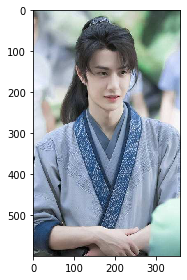

In [10]:
from skimage import io
image = io.imread(img_url)
io.imshow(image)
# io.show()
# base64_data=base64.b64encode(image)
type(image)

### 多人1（3人）

In [13]:
import requests
import pandas as pd


api_secret = "xtvDAtBOKhmHTCxQOuygiR8elHxrZZj3"
api_key = 'jAscT1FFyXnn1SHv2Gu9YpBDs0Cs6fGM'  # Replace with a valid Subscription Key here.


BASE_URL = 'https://api-cn.faceplusplus.com/facepp/v3/detect' 
img_url = 'https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1585858987182&di=f94791882fce499f40e37d7648e313f2&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20200215%2F4dc1f2ebf6aa424691b9953b5e074106.jpeg'

headers = {
    'Content-Type': 'application/json',
}

payload = {
    "image_url":img_url,
    'api_key': api_key,
    'api_secret': api_secret,
    'return_attributes':'gender,age,smiling,emotion', 
}

r = requests.post(BASE_URL, params=payload, headers=headers)

r.status_code
results = r.json() 
results

df = pd.json_normalize(results,record_path='faces')


df = df.set_index("face_token")
df = df.iloc[:,4:]
df


df = df.rename (columns = {"attributes.smile.value":"笑容",
                           "attributes.gender.value":"性别",
                           "attributes.age.value":"年龄",
                           "attributes.smile.threshold":"微笑界限",
                           "attributes.emotion.anger":"愤怒",
                           "attributes.emotion.disgust":"厌恶",
                           "attributes.emotion.fear":"恐惧",
                           "attributes.emotion.happiness":"开心",
                           "attributes.emotion.neutral":"平静",
                           "attributes.emotion.sadness":"悲伤",
                           "attributes.emotion.surprise":"惊讶"})


df.replace({"Male":"男",
            "Female":"女",})


,性别,年龄,笑容,微笑界限,愤怒,厌恶,恐惧,开心,平静,悲伤,惊讶
face_token,,,,,,,,,,,
dd43b1dd42affa7e4a17d9b7d72ae78e,男,22,100.0,50.0,0.000,0.000,0.000,100.000,0.000,0.000,0.000
e13c2d856d7349bc77e297507693dcdd,女,36,100.0,50.0,0.003,0.008,0.003,99.770,0.003,0.024,0.189
f08489199b9288b924c1e39127d72764,男,23,100.0,50.0,0.000,0.000,0.002,99.998,0.000,0.000,0.000


numpy.ndarray

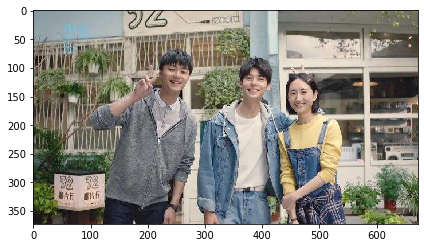

In [14]:
from skimage import io
image = io.imread(img_url)
io.imshow(image)
# io.show()
# base64_data=base64.b64encode(image)
type(image)

### 多人2（11人）

In [15]:
import requests
import pandas as pd


api_secret = "xtvDAtBOKhmHTCxQOuygiR8elHxrZZj3"
api_key = 'jAscT1FFyXnn1SHv2Gu9YpBDs0Cs6fGM'  # Replace with a valid Subscription Key here.


BASE_URL = 'https://api-cn.faceplusplus.com/facepp/v3/detect' 
img_url = 'https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1586735282091&di=4a27926ef0a7cea769775a198918c843&imgtype=0&src=http%3A%2F%2Finews.gtimg.com%2Fnewsapp_match%2F0%2F9468471847%2F0.jpg'

headers = {
    'Content-Type': 'application/json',
}

payload = {
    "image_url":img_url,
    'api_key': api_key,
    'api_secret': api_secret,
    'return_attributes':'gender,age,smiling,emotion', 
}

r = requests.post(BASE_URL, params=payload, headers=headers)

r.status_code
results = r.json() 
results

df = pd.json_normalize(results,record_path='faces')


df = df.set_index("face_token")
df = df.iloc[:,4:]
df


df = df.rename (columns = {"attributes.smile.value":"笑容",
                           "attributes.gender.value":"性别",
                           "attributes.age.value":"年龄",
                           "attributes.smile.threshold":"微笑界限",
                           "attributes.emotion.anger":"愤怒",
                           "attributes.emotion.disgust":"厌恶",
                           "attributes.emotion.fear":"恐惧",
                           "attributes.emotion.happiness":"开心",
                           "attributes.emotion.neutral":"平静",
                           "attributes.emotion.sadness":"悲伤",
                           "attributes.emotion.surprise":"惊讶"})


df.replace({"Male":"男",
            "Female":"女",})

,性别,年龄,笑容,微笑界限,愤怒,厌恶,恐惧,开心,平静,悲伤,惊讶
face_token,,,,,,,,,,,
378f4e979c1311bead473c0711dbcf43,男,21.0,0.007,50.0,0.032,0.123,0.003,0.001,99.832,0.008,0.002
006a8c64c2dafe060521e51b95784dd3,男,18.0,0.042,50.0,0.000,0.000,0.000,0.000,100.000,0.000,0.000
a33d5dd3b2f6a4cfe44aa6c2209a2c3b,女,28.0,0.110,50.0,2.602,0.034,0.034,0.124,96.444,0.280,0.481
3972861f9b4b13699232881b97b8ef5b,男,19.0,0.202,50.0,0.034,0.039,0.034,1.250,95.973,0.998,1.671
c516c00d999d68f50cb897cfebebf788,男,23.0,0.001,50.0,0.000,0.000,0.000,0.002,99.996,0.000,0.001
ec1d28106272aec71a35096144e2688e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59db7434aebf8be880fd64801e11e871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7d407011ec74b88825cdf8d9f224737a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
722bd2782010aa65bf1ae3f31d748291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


numpy.ndarray

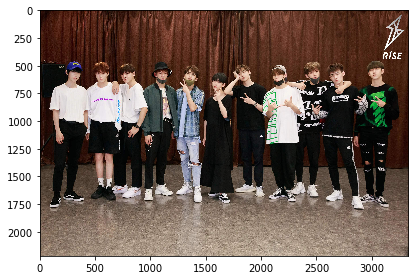

In [16]:
from skimage import io
image = io.imread(img_url)
io.imshow(image)
# io.show()
# base64_data=base64.b64encode(image)
type(image)

* **此照片共有11个人，可face++最多只能识别出5个人，在可识别的人数方面具有局限性**
* **照片中的人均为男性，可face++人脸识别却识别出了一位女性，准确性还不够高**

## 腾讯AI

### 单人

In [59]:
import hashlib  
import time  
import random  
import string
import requests  
import base64  
import requests
#import cv2
import numpy as np
from urllib.parse import urlencode
import json #用于post后得到的字符串到字典的转换

app_id = '2132961562' 
app_key = 'i1jV664OgEyNxDTU'

'''
        腾讯openai鉴权签名计算步骤：（摘抄自官网）
            用于计算签名的参数在不同接口之间会有差异，但算法过程固定如下4个步骤。
        1 将<key, value>请求参数对按key进行字典升序排序，得到有序的参数对列表N
        2 将列表N中的参数对按URL键值对的格式拼接成字符串，得到字符串T（如：key1=value1&key2=value2），URL键值拼接过程value部分需要URL编码，URL编码算法用大写字母，例如%E8，而不是小写%e8
        3 将应用密钥以app_key为键名，组成URL键值拼接到字符串T末尾，得到字符串S（如：key1=value1&key2=value2&app_key=密钥)
        4 对字符串S进行MD5运算，将得到的MD5值所有字符转换成大写，得到接口请求签名
'''

    
def get_params(img):                       
    
    time_stamp=str(int(time.time())) 

    nonce_str = ''.join(random.sample(string.ascii_letters + string.digits, 16))

    params = {'app_id':app_id,                #请求包，需要根据不同的任务修改，基本相同
              'image':img,                    #文字类的任务可能是‘text’，由主函数传递进来
              'mode':'0' ,                    #身份证件类可能是'card_type'
              'time_stamp':time_stamp,        #时间戳，都一样
              'nonce_str':nonce_str,          #随机字符串，都一样
              #'sign':''                      #签名不参与鉴权计算，只是列出来示意
             }

    sort_dict= sorted(params.items(), key=lambda item:item[0], reverse = False)  #字典排序
    sort_dict.append(('app_key',app_key))   #尾部添加appkey
    rawtext= urlencode(sort_dict).encode()  #urlencod编码
    sha = hashlib.md5()    
    sha.update(rawtext)
    md5text= sha.hexdigest().upper()        #MD5加密计算
    params['sign']=md5text                  #将签名赋值到sign
    return  params                          #返回请求包

with open(r"C:\Users\fj111\Desktop\wyb.jpg","rb")as f:
    base64_data = base64.b64encode(f.read())
    
params = get_params(base64_data)

url = "https://api.ai.qq.com/fcgi-bin/face/face_detectface"
res = requests.post(url,params).json()
res


{'ret': 0,
 'msg': 'ok',
 'data': {'image_width': 360,
  'image_height': 600,
  'face_list': [{'face_id': '3592288155671249964',
    'x': 119,
    'y': 111,
    'width': 135,
    'height': 135,
    'gender': 98,
    'age': 24,
    'expression': 17,
    'beauty': 81,
    'glass': 0,
    'pitch': 14,
    'yaw': 11,
    'roll': 2,
    'face_shape': {'face_profile': [{'x': 127, 'y': 155},
      {'x': 128, 'y': 167},
      {'x': 130, 'y': 180},
      {'x': 133, 'y': 192},
      {'x': 137, 'y': 204},
      {'x': 143, 'y': 214},
      {'x': 151, 'y': 224},
      {'x': 160, 'y': 232},
      {'x': 170, 'y': 239},
      {'x': 182, 'y': 243},
      {'x': 194, 'y': 243},
      {'x': 204, 'y': 238},
      {'x': 211, 'y': 230},
      {'x': 217, 'y': 221},
      {'x': 223, 'y': 212},
      {'x': 228, 'y': 203},
      {'x': 232, 'y': 193},
      {'x': 235, 'y': 182},
      {'x': 237, 'y': 172},
      {'x': 237, 'y': 161},
      {'x': 237, 'y': 151}],
     'left_eye': [{'x': 160, 'y': 153},
      {'x':

### 多人1（3人）

In [55]:
import hashlib  
import time  
import random  
import string
import requests  
import base64  
import requests
#import cv2
import numpy as np
from urllib.parse import urlencode
import json #用于post后得到的字符串到字典的转换

app_id = '2132961562' 
app_key = 'i1jV664OgEyNxDTU'

'''
        腾讯openai鉴权签名计算步骤：（摘抄自官网）
            用于计算签名的参数在不同接口之间会有差异，但算法过程固定如下4个步骤。
        1 将<key, value>请求参数对按key进行字典升序排序，得到有序的参数对列表N
        2 将列表N中的参数对按URL键值对的格式拼接成字符串，得到字符串T（如：key1=value1&key2=value2），URL键值拼接过程value部分需要URL编码，URL编码算法用大写字母，例如%E8，而不是小写%e8
        3 将应用密钥以app_key为键名，组成URL键值拼接到字符串T末尾，得到字符串S（如：key1=value1&key2=value2&app_key=密钥)
        4 对字符串S进行MD5运算，将得到的MD5值所有字符转换成大写，得到接口请求签名
'''

    
def get_params(img):                       
    
    time_stamp=str(int(time.time())) 

    nonce_str = ''.join(random.sample(string.ascii_letters + string.digits, 16))

    params = {'app_id':app_id,                #请求包，需要根据不同的任务修改，基本相同
              'image':img,                    #文字类的任务可能是‘text’，由主函数传递进来
              'mode':'0' ,                    #身份证件类可能是'card_type'
              'time_stamp':time_stamp,        #时间戳，都一样
              'nonce_str':nonce_str,          #随机字符串，都一样
              #'sign':''                      #签名不参与鉴权计算，只是列出来示意
             }

    sort_dict= sorted(params.items(), key=lambda item:item[0], reverse = False)  #字典排序
    sort_dict.append(('app_key',app_key))   #尾部添加appkey
    rawtext= urlencode(sort_dict).encode()  #urlencod编码
    sha = hashlib.md5()    
    sha.update(rawtext)
    md5text= sha.hexdigest().upper()        #MD5加密计算
    params['sign']=md5text                  #将签名赋值到sign
    return  params                          #返回请求包

with open(r"C:\Users\fj111\Desktop\xjn.jpg","rb")as f:
    base64_data = base64.b64encode(f.read())
    
params = get_params(base64_data)

url = "https://api.ai.qq.com/fcgi-bin/face/face_detectface"
res = requests.post(url,params).json()
res


{'ret': 0,
 'msg': 'ok',
 'data': {'image_width': 672,
  'image_height': 373,
  'face_list': [{'face_id': '3592286624929596453',
    'x': 441,
    'y': 128,
    'width': 52,
    'height': 52,
    'gender': 0,
    'age': 34,
    'expression': 81,
    'beauty': 79,
    'glass': 0,
    'pitch': 15,
    'yaw': -8,
    'roll': 6,
    'face_shape': {'face_profile': [{'x': 444, 'y': 145},
      {'x': 444, 'y': 150},
      {'x': 445, 'y': 154},
      {'x': 446, 'y': 158},
      {'x': 448, 'y': 163},
      {'x': 449, 'y': 166},
      {'x': 452, 'y': 170},
      {'x': 455, 'y': 173},
      {'x': 459, 'y': 176},
      {'x': 463, 'y': 177},
      {'x': 467, 'y': 178},
      {'x': 472, 'y': 177},
      {'x': 476, 'y': 175},
      {'x': 480, 'y': 172},
      {'x': 483, 'y': 169},
      {'x': 485, 'y': 164},
      {'x': 487, 'y': 160},
      {'x': 487, 'y': 155},
      {'x': 487, 'y': 151},
      {'x': 487, 'y': 146},
      {'x': 487, 'y': 142}],
     'left_eye': [{'x': 450, 'y': 145},
      {'x': 45

### 多人2（11人）

In [15]:
import hashlib  
import time  
import random  
import string
import requests  
import base64  
import requests
#import cv2
import numpy as np
from urllib.parse import urlencode
import json #用于post后得到的字符串到字典的转换

app_id = '2132961562' 
app_key = 'i1jV664OgEyNxDTU'

'''
        腾讯openai鉴权签名计算步骤：（摘抄自官网）
            用于计算签名的参数在不同接口之间会有差异，但算法过程固定如下4个步骤。
        1 将<key, value>请求参数对按key进行字典升序排序，得到有序的参数对列表N
        2 将列表N中的参数对按URL键值对的格式拼接成字符串，得到字符串T（如：key1=value1&key2=value2），URL键值拼接过程value部分需要URL编码，URL编码算法用大写字母，例如%E8，而不是小写%e8
        3 将应用密钥以app_key为键名，组成URL键值拼接到字符串T末尾，得到字符串S（如：key1=value1&key2=value2&app_key=密钥)
        4 对字符串S进行MD5运算，将得到的MD5值所有字符转换成大写，得到接口请求签名
'''

    
def get_params(img):                       
    
    time_stamp=str(int(time.time())) 

    nonce_str = ''.join(random.sample(string.ascii_letters + string.digits, 16))

    params = {'app_id':app_id,                #请求包，需要根据不同的任务修改，基本相同
              'image':img,                    #文字类的任务可能是‘text’，由主函数传递进来
              'mode':'0' ,                    #身份证件类可能是'card_type'
              'time_stamp':time_stamp,        #时间戳，都一样
              'nonce_str':nonce_str,          #随机字符串，都一样
              #'sign':''                      #签名不参与鉴权计算，只是列出来示意
             }

    sort_dict= sorted(params.items(), key=lambda item:item[0], reverse = False)  #字典排序
    sort_dict.append(('app_key',app_key))   #尾部添加appkey
    rawtext= urlencode(sort_dict).encode()  #urlencod编码
    sha = hashlib.md5()    
    sha.update(rawtext)
    md5text= sha.hexdigest().upper()        #MD5加密计算
    params['sign']=md5text                  #将签名赋值到sign
    return  params                          #返回请求包

with open(r"C:\Users\fj111\Desktop\hu.jpg","rb")as f:
    base64_data = base64.b64encode(f.read())
    
params = get_params(base64_data)

url = "https://api.ai.qq.com/fcgi-bin/face/face_detectface"
res = requests.post(url,params).json()
res


{'ret': -2147483636,
 'msg': 'system busy, please try again later',
 'data': {'image_width': 0, 'image_height': 0, 'face_list': []}}

* **ps：在运行时出现了“系统繁忙，请稍后再试”的提示。以11人为例，可以得知，在腾讯AI，难以实现多人数的识别。**

换成6人图片进行尝试↓↓↓

### 多人3（6人）

In [19]:
import hashlib  
import time  
import random  
import string
import requests  
import base64  
import requests
#import cv2
import numpy as np
from urllib.parse import urlencode
import json #用于post后得到的字符串到字典的转换

app_id = '2132961562' 
app_key = 'i1jV664OgEyNxDTU'

'''
        腾讯openai鉴权签名计算步骤：（摘抄自官网）
            用于计算签名的参数在不同接口之间会有差异，但算法过程固定如下4个步骤。
        1 将<key, value>请求参数对按key进行字典升序排序，得到有序的参数对列表N
        2 将列表N中的参数对按URL键值对的格式拼接成字符串，得到字符串T（如：key1=value1&key2=value2），URL键值拼接过程value部分需要URL编码，URL编码算法用大写字母，例如%E8，而不是小写%e8
        3 将应用密钥以app_key为键名，组成URL键值拼接到字符串T末尾，得到字符串S（如：key1=value1&key2=value2&app_key=密钥)
        4 对字符串S进行MD5运算，将得到的MD5值所有字符转换成大写，得到接口请求签名
'''

    
def get_params(img):                       
    
    time_stamp=str(int(time.time())) 

    nonce_str = ''.join(random.sample(string.ascii_letters + string.digits, 16))

    params = {'app_id':app_id,                #请求包，需要根据不同的任务修改，基本相同
              'image':img,                    #文字类的任务可能是‘text’，由主函数传递进来
              'mode':'0' ,                    #身份证件类可能是'card_type'
              'time_stamp':time_stamp,        #时间戳，都一样
              'nonce_str':nonce_str,          #随机字符串，都一样
              #'sign':''                      #签名不参与鉴权计算，只是列出来示意
             }

    sort_dict= sorted(params.items(), key=lambda item:item[0], reverse = False)  #字典排序
    sort_dict.append(('app_key',app_key))   #尾部添加appkey
    rawtext= urlencode(sort_dict).encode()  #urlencod编码
    sha = hashlib.md5()    
    sha.update(rawtext)
    md5text= sha.hexdigest().upper()        #MD5加密计算
    params['sign']=md5text                  #将签名赋值到sign
    return  params                          #返回请求包

with open(r"C:\Users\fj111\Desktop\bingtang.jpg","rb")as f:
    base64_data = base64.b64encode(f.read())
    
params = get_params(base64_data)

url = "https://api.ai.qq.com/fcgi-bin/face/face_detectface"
res = requests.post(url,params).json()
res


{'ret': 0,
 'msg': 'ok',
 'data': {'image_width': 440,
  'image_height': 330,
  'face_list': [{'face_id': '3593219126000130668',
    'x': 256,
    'y': 87,
    'width': 24,
    'height': 24,
    'gender': 0,
    'age': 11,
    'expression': 46,
    'beauty': 75,
    'glass': 0,
    'pitch': 15,
    'yaw': -3,
    'roll': 3,
    'face_shape': {'face_profile': [{'x': 256, 'y': 95},
      {'x': 256, 'y': 97},
      {'x': 256, 'y': 99},
      {'x': 257, 'y': 102},
      {'x': 258, 'y': 104},
      {'x': 259, 'y': 106},
      {'x': 261, 'y': 108},
      {'x': 263, 'y': 109},
      {'x': 265, 'y': 111},
      {'x': 267, 'y': 111},
      {'x': 270, 'y': 111},
      {'x': 272, 'y': 111},
      {'x': 273, 'y': 109},
      {'x': 275, 'y': 107},
      {'x': 276, 'y': 106},
      {'x': 277, 'y': 104},
      {'x': 278, 'y': 101},
      {'x': 278, 'y': 99},
      {'x': 278, 'y': 97},
      {'x': 278, 'y': 95},
      {'x': 278, 'y': 93}],
     'left_eye': [{'x': 260, 'y': 94},
      {'x': 261, 'y': 9

* **在腾讯AI中，对6人的照片进行人脸识别，运行后的结果却只显示了其中4张人脸的有关数据。由此可知：腾讯AI比face++（最多可识别5人）可识别的人数少**

## 3家API不同之处

### 总结：

* Microsoft Azure：可以分析人物的多种情感状态，识别出人物脸上的装饰（如：眼镜）。相比另外2个‘人脸识别服务平台’，Azure在可识别人数方面做得较好，识别分析准确性较高。
* face++：可以分析人物的多种情感状态，可以识别5人及5人以下的脸部情感状态，在可识别人数方面存在较大局限性，性别识别方面的数据不太准确。
* 腾讯AI：精准定位每个人五官的位置，给出脸型、左右眼睛、眉毛、嘴巴、鼻子的精准数据。在可识别人数方面仍然存在较大的局限性，腾讯AI比face++（最多可识别5人）可识别成功的人数少，只能返回4张人脸的数据。